# Analysis of the Magpie target signal

In [2]:
from pathlib import Path
import wave
from scipy.io.wavfile import read
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = Path("../resources/magpie. 35k, mono, 8-bit, 11025 Hz, 3.3 seconds.wav")

# with scipy
raw_scipy = read(DATA_PATH)

# with wave and numpy
# Read file to get buffer                                                                                               
ifile = wave.open(str(DATA_PATH)) # BUG with pathlib
samples = ifile.getnframes()
audio = ifile.readframes(samples)
rate = ifile.getframerate() # duration of a frame (sample duration)

# Convert buffer to float32 using NumPy                                                                                 
audio_as_np_uint8 = np.frombuffer(audio, dtype=np.uint8)
audio_as_np_float32 = audio_as_np_uint8.astype(np.float32)

# Normalise float32 array so that values are between 0 and +1.0                                                      
max_uint8 = 255
audio_normalised = audio_as_np_float32 / max_uint8


The magpie sound in array form.

In [3]:
print(raw_scipy)
print(audio_as_np_uint8)
print(audio_normalised)

(11025, array([129, 126, 128, ..., 128, 127, 125], dtype=uint8))
[129 126 128 ... 128 127 125]
[0.5058824  0.49411765 0.5019608  ... 0.5019608  0.49803922 0.49019608]


Plotting the magpie sound.

Text(0, 0.5, 'amplitude')

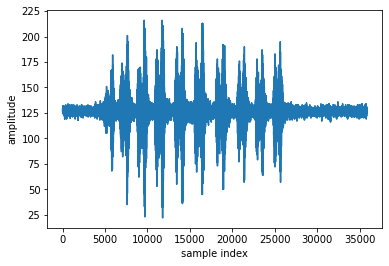

In [4]:
x = list(range(len(raw_scipy[1])))
y = raw_scipy[1]

fig, ax = plt.subplots()
plt.plot(x, y)
ax.set_xlabel("sample index")
ax.set_ylabel("amplitude")

Fourier analysis of the magpie sound in order to estimate the highest frequency.
The highest frequency gives rise to Nyquist rate at which sampling without loss occurs.

In [5]:
frames = samples
# rate is number of samples per second (sampling frequency)
duration = frames / rate

Text(0, 0.5, 'log-amplitude')

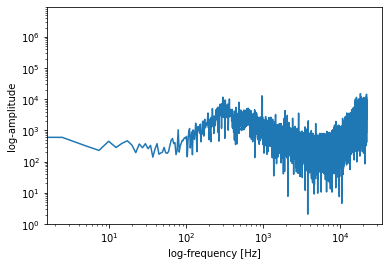

In [8]:
# apply fourier transform to signal
spectrum = np.fft.rfft(y)
abs_spec = abs(spectrum)
sample_spacing = 1.0 / 44100 # inverse of the sampling rate
freq = np.fft.fftfreq(len(abs_spec), d=sample_spacing)

# plot negative spectrum first and avoid horizontal line in plot
abs_spec = np.fft.fftshift(abs_spec)
freq = np.fft.fftshift(freq)

fig, ax = plt.subplots()
plt.plot(freq, abs_spec)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("log-frequency [Hz]")
ax.set_ylabel('log-amplitude')



The Fourier transform implies that the fastest frequency is less than $10^4$ Hz.

Ngspice is slow to compute signals.
For example, a circuit of a single oscillator at around 0.5 GHz takes around 2 h for a single second of signal.
Therefore I reduce the target signal from 3 s to 0.3 s.
This is preferable to scaling up the generated signal, because we would like to know what the limits of the generated signal are - it shouldn't be obfuscated.

# Plotting the signal generated from the sum of oscillators.

Text(0, 0.5, 'amplitude')

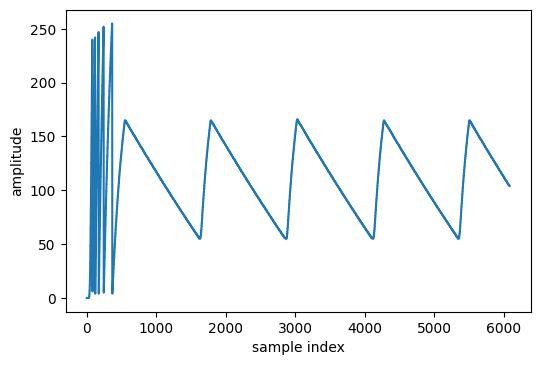

In [29]:
DATA_PATH = Path("../data/out.wav")

raw_scipy = read(DATA_PATH)

x = list(range(len(raw_scipy[1])))
y = raw_scipy[1]

fig, ax = plt.subplots()
#fig.set_size_inches((7, 5))
fig.set_dpi(100)
plt.plot(x, y)
ax.set_xlabel("sample index")
ax.set_ylabel("amplitude")

## Verifying with a good example

In [20]:
from scipy.io.wavfile import write
samplerate = 44100; fs = 100
t = np.linspace(0., 1., samplerate)
amplitude = np.iinfo(np.int16).max
data = amplitude * np.sin(2. * np.pi * fs * t)
write("../data/example.wav", samplerate, data.astype(np.int16))


Text(0, 0.5, 'amplitude, scaled by int16=32767')

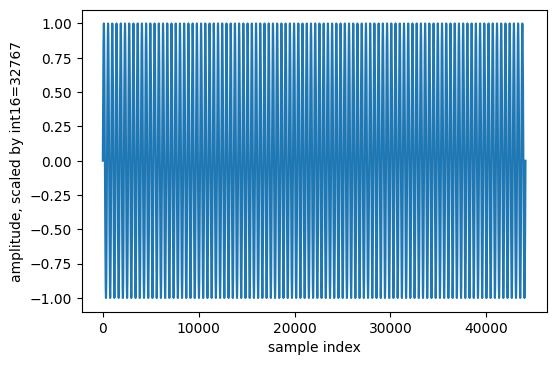

In [21]:

x = list(range(len(t)))
y = np.sin(2. * np.pi * fs * t)

fig, ax = plt.subplots()
#fig.set_size_inches((7, 5))
fig.set_dpi(100)
plt.plot(x, y)
ax.set_xlabel("sample index")
ax.set_ylabel("amplitude, scaled by int16=32767")

Text(0, 0.5, 'amplitude, scaled by int16=32767')

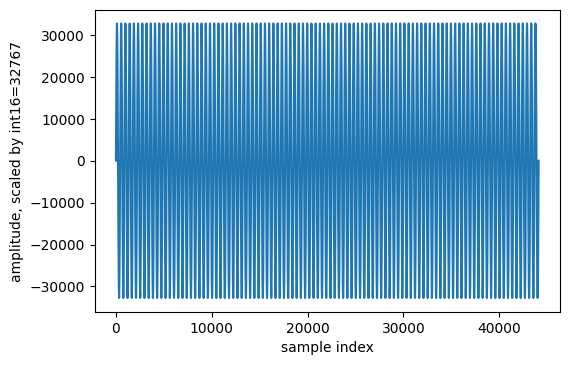

In [22]:

x = list(range(len(t)))
y = data

fig, ax = plt.subplots()
#fig.set_size_inches((7, 5))
fig.set_dpi(100)
plt.plot(x, y)
ax.set_xlabel("sample index")
ax.set_ylabel("amplitude, scaled by int16=32767")